# Set up requirements and load data

In [1]:
!pip install -r ../requirements.txt

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
import matplotlib.pyplot as plt

In [3]:
data_path = '../data/framingham.csv'

data = pd.read_csv(data_path)

# Quick EDA

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
data.info

<bound method DataFrame.info of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0        

In [7]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
missing_percent = data.isnull().mean() * 100

missing_percent

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

Impute missing values that shall we?

In [9]:
from sklearn.impute import SimpleImputer

X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

data_imputed = pd.concat([X_imputed, y.reset_index(drop=True)], axis=1)

In [10]:
data_imputed.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Preprocess data for modeling

In [11]:
continuous_features = [
    'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP',
    'BMI', 'heartRate', 'glucose', 'education'
]

scaler = StandardScaler()

X_scaled_continuous = pd.DataFrame(
    scaler.fit_transform(data_imputed[continuous_features]),
    columns=continuous_features
)

binary_features = [
    'male', 'currentSmoker', 'BPMeds', 'prevalentStroke',
    'prevalentHyp', 'diabetes'
]

X_processed = pd.concat([X_scaled_continuous, data_imputed[binary_features].reset_index(drop=True)], axis=1)
y = data_imputed['TenYearCHD'].reset_index(drop=True)

In [12]:
X_final = X_processed

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 3390 samples
Test set size: 848 samples


In [14]:
class_counts = y_train.value_counts()
print("Class distribution in training set:")
print(class_counts)

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)


Class distribution in training set:
TenYearCHD
0    2875
1     515
Name: count, dtype: int64
Class weights: {0: np.float64(0.5895652173913043), 1: np.float64(3.29126213592233)}


## Import the LogisticRegressionNAG class and train the model

In [15]:
import sys
import os

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.join(notebook_dir, '..'))
from src import LogisticRegressionNAG

In [16]:
X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train

model = LogisticRegressionNAG(learning_rate=0.01, momentum=0.9, n_iters=5000)
model.fit(X_train_np, y_train)

In [17]:
X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_pred_proba = model.predict_proba(X_test_np)
y_pred = model.predict(X_test_np)

# Evaluate the model

In [18]:
from sklearn.metrics import roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)


Accuracy: 0.8479
Precision: 0.5000
Recall: 0.0620
F1 Score: 0.1103
ROC AUC Score: 0.6992
Confusion Matrix:
[[711   8]
 [121   8]]


The model is missing a large number of patients who are at risk of CHD. Due to the class imbalance, the model is not able to learn the patterns of the minority class. I should try to process the data to balance the classes and retrain the model. ) : However, let's do some visualization for better understanding of the model performance.

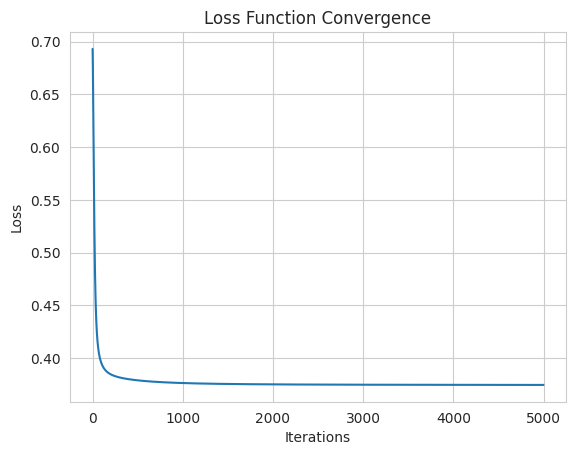

In [19]:
plt.plot(range(len(model.loss_history)), model.loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function Convergence')
plt.show()

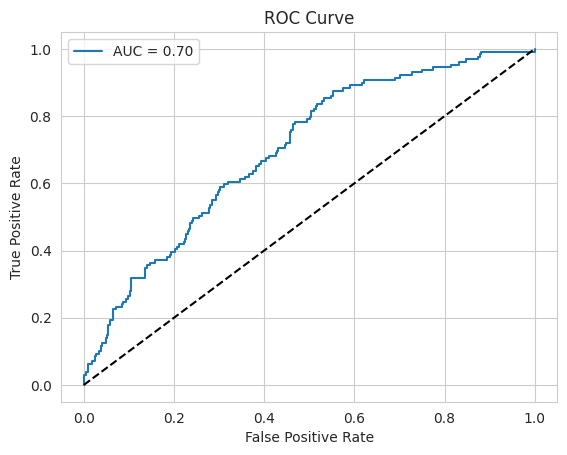

In [20]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


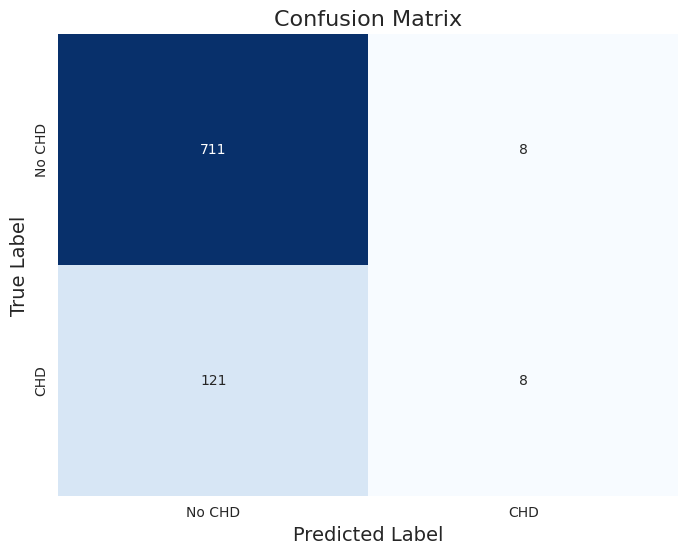

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_pred = model.predict(X_test_np, threshold=0.5)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


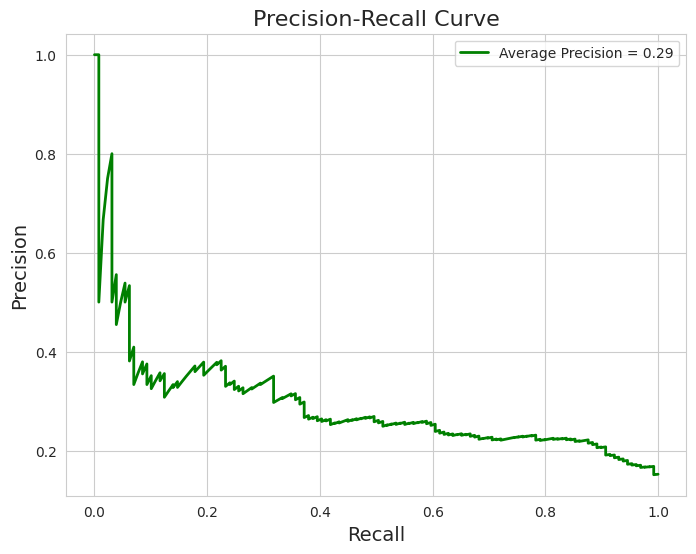

In [23]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Average Precision = {avg_precision:.2f}')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
